In [21]:
import nltk
nltk.download('inaugural')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import inaugural, stopwords

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rahar\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1-Loading corpus

I will be using the NLTK Inaugural adress corpus, which looks at all U.S presidential inaugural speeches

In [30]:
tokens = [w for fid in inaugural.fileids() for w in inaugural.words(fid)]
tokens_clean = [t.lower() for t in tokens if t.isalpha()]

#remove stopwords
stop = set(stopwords.words('english'))
tokens_nostop = [t for t in tokens_clean if t not in stop]

total_tokens = len(tokens_nostop)
unique_words = set(tokens_nostop)
total_unique = len(unique_words)

print("total tokens:", total_tokens)
print("unique words:", total_unique)


total tokens: 66958
unique words: 9215


2-How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, 
defensible way).

There are 9215 unique words

3-Taking the most common words, how many unique words represent half of the total words in the corpus?

487 unique words account for half of all the words

In [34]:
freq = Counter(tokens_nostop).most_common()
half = total_tokens / 2
running = 0
k_for_half = 0
for i, (_, c) in enumerate(freq, start=1):
    running += c
    if running >= half:
        k_for_half = i
        break

print( k_for_half)

487


4-Identify the 200 highest frequency words in this corpus. 

In [35]:
top_n = 200
top200 = freq[:top_n]
top200_df = pd.DataFrame(top200, columns=["word", "count"])
top200_df["rel_freq"] = top200_df["count"] / total_tokens
top200_df.head(10)

,word,count,rel_freq
0,government,611,0.009125
1,people,602,0.008991
2,us,505,0.007542
3,must,375,0.005601
4,upon,371,0.005541
5,great,356,0.005317
6,world,356,0.005317
7,nation,348,0.005197
8,states,344,0.005138
9,may,343,0.005123


5-Create a graph that shows the relative frequency of these 200 words. 

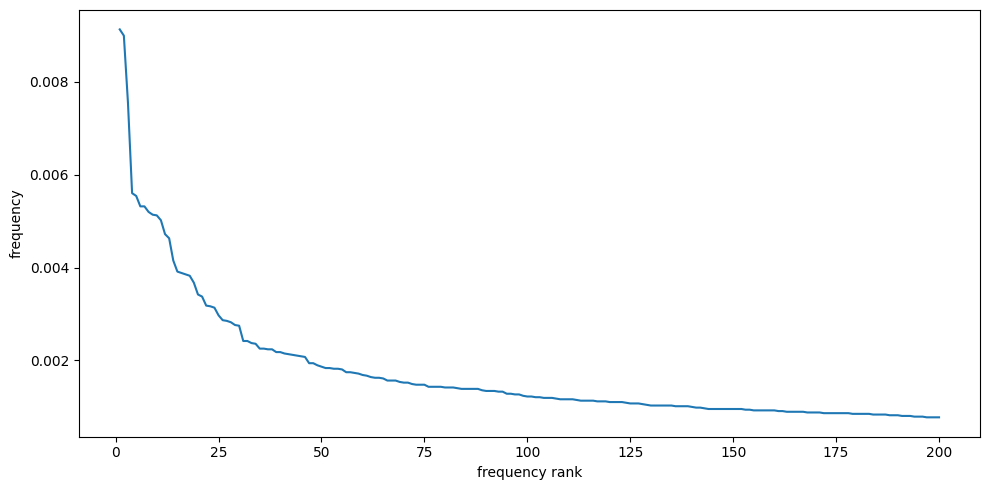

In [37]:
plt.figure(figsize=(10,5))
plt.plot(range(1, top_n+1), top200_df["rel_freq"].values)
plt.xlabel("frequency rank")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

6-Does the observed relative frequency of these words follow Zipf’s law?  Explain. 

The curve seems to roughly follow Zipf’s law. A small number of words are very frequent (shorp drop at the start), but most words appear rarely (flat tail). 

7-In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 

Because this corpus relates to inaugural speeches, it is more formal and specific. It has a higher frequency of words related to politics like nation, freedom, people, and fewer everyday words. It’s less diverse in vocabulary and tone.